# Fetal Health Classification

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("fetal_health.csv")

In [13]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [14]:
df.shape

(2126, 22)

## Exploratory Analysis

### Handling Null values

In [15]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Handling Outliers

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [17]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


<Axes: xlabel='percentage_of_time_with_abnormal_long_term_variability', ylabel='Count'>

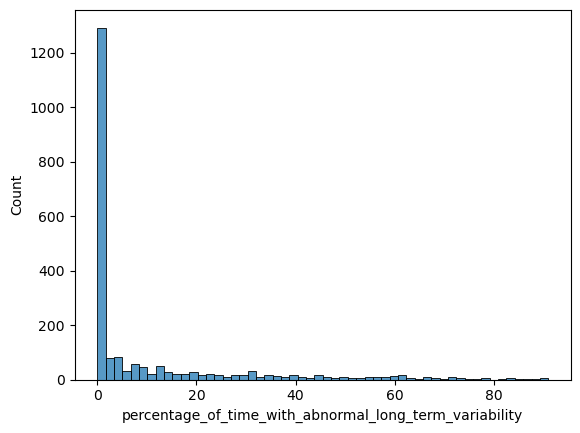

In [18]:
sns.histplot(data=df, x="percentage_of_time_with_abnormal_long_term_variability")

In [19]:
p_q1 = df["percentage_of_time_with_abnormal_long_term_variability"].quantile(0.25)
p_q3 = df["percentage_of_time_with_abnormal_long_term_variability"].quantile(0.75)
p_iqr = p_q3 - p_q1
p_low = p_q1 - 1.5*p_iqr
p_high = p_q3 + 1.5*p_iqr

In [20]:
df1 = df[(df["percentage_of_time_with_abnormal_long_term_variability"]>p_low) & (df["percentage_of_time_with_abnormal_long_term_variability"]<p_high)]
df1.shape

(1817, 22)

<Axes: ylabel='percentage_of_time_with_abnormal_long_term_variability'>

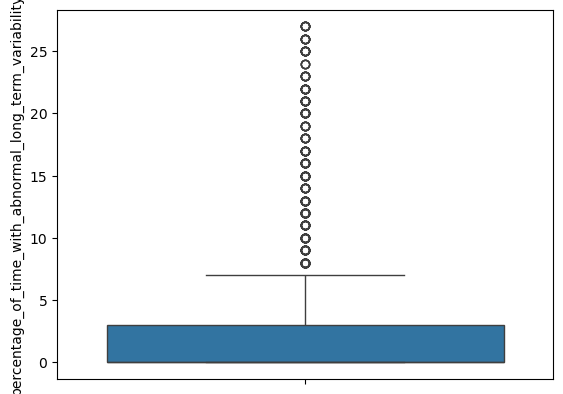

In [21]:
sns.boxplot(data=df1, y="percentage_of_time_with_abnormal_long_term_variability")

In [22]:
df1.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,...,1817.000000,1817.000000,1817.000000,1817.00000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000
mean,132.248211,0.003674,0.010565,0.004696,0.002167,0.000004,0.000185,44.103467,1.477215,3.106769,...,88.999450,165.691800,4.359384,0.35388,136.456247,133.342873,137.088057,21.608696,0.315905,1.214089
std,9.610047,0.003959,0.050341,0.002873,0.003099,0.000062,0.000634,16.244120,0.870938,6.107485,...,27.994286,18.053814,2.967363,0.72838,16.899365,15.970778,14.777310,30.294905,0.606804,0.548184
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.00000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,125.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,30.000000,0.900000,0.000000,...,64.000000,153.000000,2.000000,0.00000,127.000000,124.000000,128.000000,3.000000,0.000000,1.000000
50%,132.000000,0.003000,0.000000,0.005000,0.000000,0.000000,0.000000,43.000000,1.300000,0.000000,...,85.000000,165.000000,4.000000,0.00000,138.000000,134.000000,138.000000,10.000000,0.000000,1.000000
75%,139.000000,0.006000,0.002000,0.007000,0.004000,0.000000,0.000000,58.000000,1.900000,3.000000,...,113.000000,177.000000,6.000000,1.00000,147.000000,145.000000,147.000000,27.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,86.000000,7.000000,27.000000,...,158.000000,238.000000,18.000000,10.00000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


<Axes: ylabel='histogram_variance'>

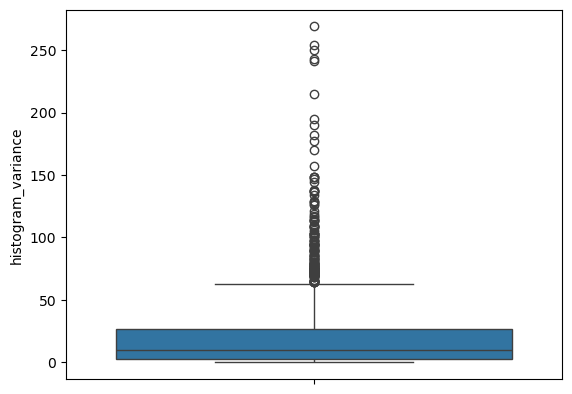

In [23]:
sns.boxplot(y="histogram_variance", data=df1)

In [24]:
hist_variance_q1 = df1["histogram_variance"].quantile(0.25)
hist_variance_q3 = df1["histogram_variance"].quantile(0.75)
hist_variance_iqr = hist_variance_q3 - hist_variance_q1
hist_variance_low = hist_variance_q1 - (1.5*hist_variance_iqr)
hist_variance_high = hist_variance_q3 + (1.5*hist_variance_iqr)

In [25]:
df2 = df1[(df1["histogram_variance"]>hist_variance_low) & (df1["histogram_variance"]<hist_variance_high)]
df2.shape

(1655, 22)

In [26]:
df2.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.0,1655.000000,1655.000000,1655.000000,1655.000000,...,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000
mean,132.332326,0.003699,0.008392,0.004541,0.001819,0.0,0.000102,44.363746,1.373837,3.315408,...,91.825378,164.245317,4.110574,0.328097,137.526888,134.823565,138.154683,14.068882,0.334743,1.159517
std,9.836795,0.003963,0.043360,0.002772,0.002773,0.0,0.000443,16.152482,0.760337,6.227225,...,27.568213,17.620588,2.871151,0.697570,14.622839,14.738521,13.762329,14.697435,0.594489,0.457298
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,86.000000,78.000000,93.000000,0.000000,-1.000000,1.000000
25%,125.000000,0.000000,0.000000,0.003000,0.000000,0.0,0.000000,30.000000,0.800000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,3.000000,0.000000,1.000000
50%,133.000000,0.003000,0.000000,0.005000,0.000000,0.0,0.000000,44.000000,1.200000,0.000000,...,91.000000,163.000000,4.000000,0.000000,138.000000,135.000000,139.000000,8.000000,0.000000,1.000000
75%,140.000000,0.006000,0.002000,0.007000,0.003000,0.0,0.000000,58.000000,1.700000,4.000000,...,115.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,21.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.0,0.005000,86.000000,5.700000,27.000000,...,158.000000,238.000000,18.000000,10.000000,186.000000,182.000000,186.000000,62.000000,1.000000,3.000000


#### Dropping some less important features

In [27]:
df_final = df2.drop(["histogram_number_of_zeroes","percentage_of_time_with_abnormal_long_term_variability","histogram_number_of_peaks"], axis=1)
df_final.shape

(1655, 19)

### Scaling Data

In [28]:
target = df_final["fetal_health"]
features = df_final.drop("fetal_health", axis=1)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
x = scaler.fit_transform(features)

## Machine Learning Model Apply

### Splitting Train, Test Model

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.2)

In [32]:
x_train.shape

(1324, 18)

In [33]:
x_test.shape

(331, 18)

### Finding the best Model

In [34]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def find_best_classification_model_using_gridsearchcv(X, y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(solver='liblinear'),
            'params': {
                'C': [0.1, 1, 10],
                'penalty': ['l1', 'l2']
            }
        },
        'svc': {
            'model': SVC(),
            'params': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 50],
                'criterion': ['gini', 'entropy']
            }
        },
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [35]:
find_best_classification_model_using_gridsearchcv(x, target)

,model,best_score,best_params
0,logistic_regression,0.939577,"{'C': 10, 'penalty': 'l1'}"
1,svc,0.948640,"{'C': 10, 'kernel': 'rbf'}"
2,decision_tree,0.943807,"{'criterion': 'entropy', 'splitter': 'best'}"
3,random_forest,0.955287,"{'criterion': 'entropy', 'n_estimators': 50}"


### Training and Testing the Model (Random Forest)

In [36]:
model = RandomForestClassifier(criterion='entropy', n_estimators=50)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [37]:
model.score(x_test, y_test)

0.9486404833836858

### Save the Model

In [38]:
import pickle

with open("fetal_health_classifier", "wb") as f:
    pickle.dump(model, f)

In [39]:
with open("fetal_health_classifier", "rb") as f:
    loaded_model = pickle.load(f)

In [40]:
loaded_model.score(x_test, y_test)

0.9486404833836858